In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df = pd.read_csv("E:\Data_Sets\corona.csv")
df.head(7)

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,2/5/20 16:43,16678.0,NaN,538.0,479.0
1,Guangdong,Mainland China,2/5/20 13:23,895.0,NaN,49.0,0.0
2,Zhejiang,Mainland China,2/5/20 15:13,895.0,NaN,78.0,0.0
3,Henan,Mainland China,2/5/20 15:03,764.0,NaN,47.0,2.0
4,Hunan,Mainland China,2/5/20 15:23,661.0,NaN,54.0,0.0
5,Jiangxi,Mainland China,2/5/20 1:33,548.0,NaN,27.0,0.0
6,Anhui,Mainland China,2/5/20 13:43,530.0,NaN,23.0,0.0


In [19]:
#check the number of missing values
df.isnull().sum()

Province/State     459
Country/Region       0
Last Update          0
Confirmed           30
Suspected         1789
Recovered          876
Death              999
dtype: int64

In [20]:
df.dtypes

Province/State     object
Country/Region     object
Last Update        object
Confirmed         float64
Suspected         float64
Recovered         float64
Death             float64
dtype: object

In [21]:
def abc(series):
    return series.fillna(0)



#command to fill the empty cells
df.Suspected = df["Suspected"].transform(abc)

In [22]:
#check the number of missing values
df.isnull().sum()

Province/State    459
Country/Region      0
Last Update         0
Confirmed          30
Suspected           0
Recovered         876
Death             999
dtype: int64

In [23]:
set = df.dropna()

In [24]:
set

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,2/5/20 16:43,16678.0,0.0,538.0,479.0
1,Guangdong,Mainland China,2/5/20 13:23,895.0,0.0,49.0,0.0
2,Zhejiang,Mainland China,2/5/20 15:13,895.0,0.0,78.0,0.0
3,Henan,Mainland China,2/5/20 15:03,764.0,0.0,47.0,2.0
4,Hunan,Mainland China,2/5/20 15:23,661.0,0.0,54.0,0.0
...,...,...,...,...,...,...,...
1599,Hubei,Mainland China,1/25/2020 12:00 PM,761.0,0.0,32.0,40.0
1643,Hubei,Mainland China,1/25/2020 12:00 AM,729.0,0.0,32.0,39.0
1687,Hubei,Mainland China,1/24/2020 12:00 PM,549.0,0.0,31.0,24.0
1728,Hubei,Mainland China,1/24/2020 12:00 AM,549.0,0.0,31.0,24.0


In [52]:
set.describe()

,Confirmed,Suspected,Recovered,Death
count,598.000000,598.000000,598.000000,598.000000
mean,448.994983,0.240803,13.538462,10.841137
std,1778.111136,4.160379,50.785103,55.652155
min,1.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000
50%,64.000000,0.000000,2.000000,0.000000
75%,227.250000,0.000000,7.000000,1.000000
max,16678.000000,72.000000,538.000000,479.000000


(0, 916)

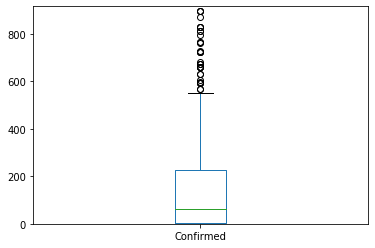

In [43]:
set.Confirmed.plot(kind = "box", layout = (1,1))
plt.ylim(0,916)

Recovered       AxesSubplot(0.125,0.536818;0.352273x0.343182)
Death        AxesSubplot(0.547727,0.536818;0.352273x0.343182)
dtype: object

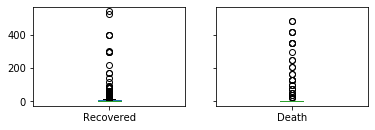

In [46]:
#Comparing Recovered and Deaths with box plots
set[["Recovered","Death"]].plot(kind = "box", subplots = True, layout = (2,2), sharex = True,sharey = True)

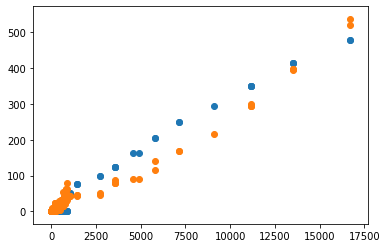

In [57]:
plt.scatter(list(set.Confirmed),list(set.Death))
plt.scatter(list(set.Confirmed),list(set.Recovered))

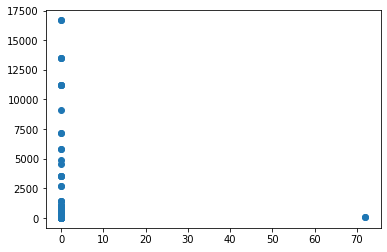

In [65]:
plt.scatter(list(set.Suspected),list(set.Confirmed))

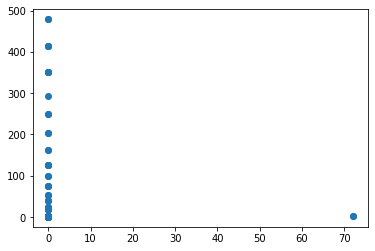

In [66]:
plt.scatter(list(set.Suspected),list(set.Death))

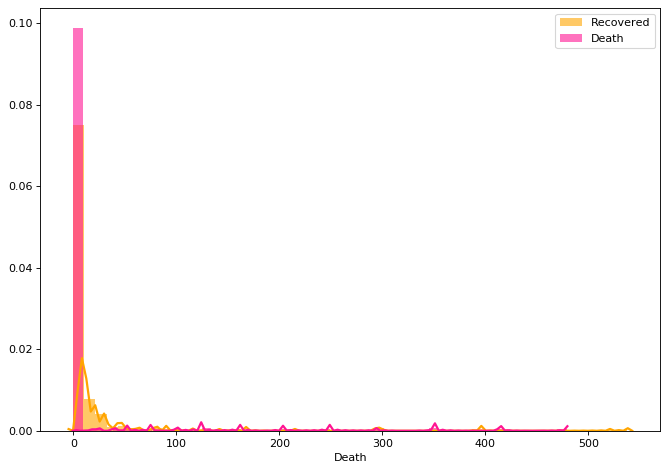

In [92]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(set.Recovered, color="orange", label="Recovered", **kwargs)
sns.distplot(set.Death, color="deeppink", label="Death", **kwargs)
plt.legend();

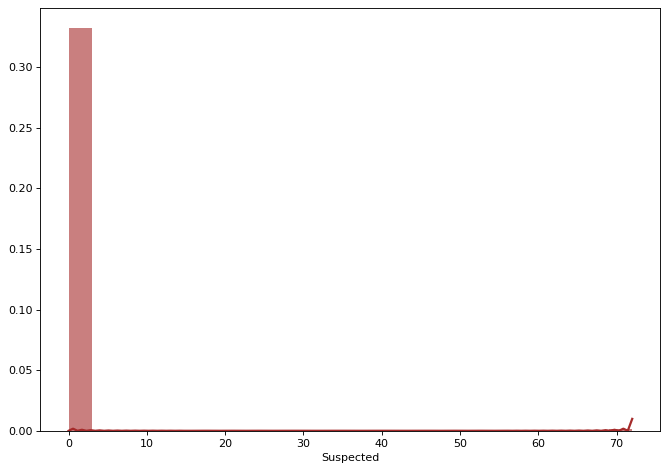

In [107]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(set.Suspected, color="brown", label="Suspected", **kwargs)

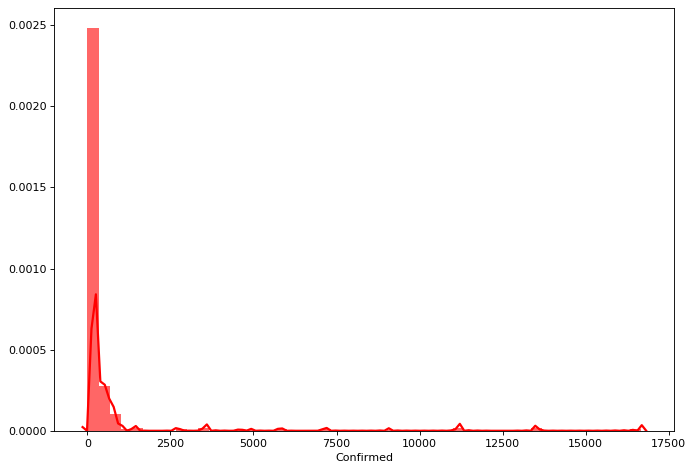

In [103]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(set.Confirmed, color="red", label="Confirmed", **kwargs)

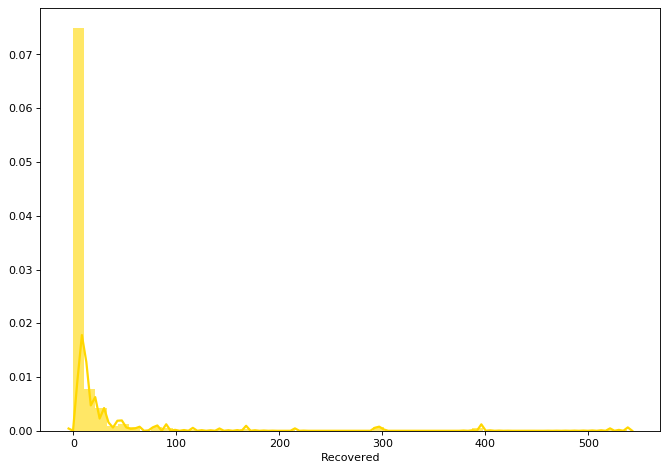

In [102]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(set.Recovered, color="gold", label="Recovered", **kwargs)

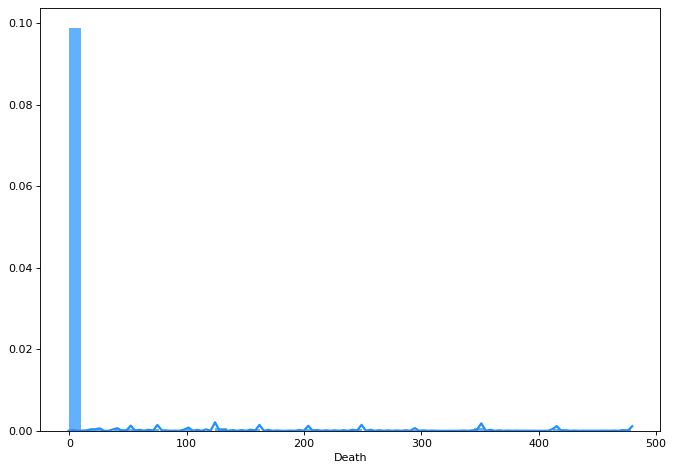

In [89]:
kwargs = dict(hist_kws={'alpha':0.7}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(set.Death, color="dodgerblue", label="Death", **kwargs)

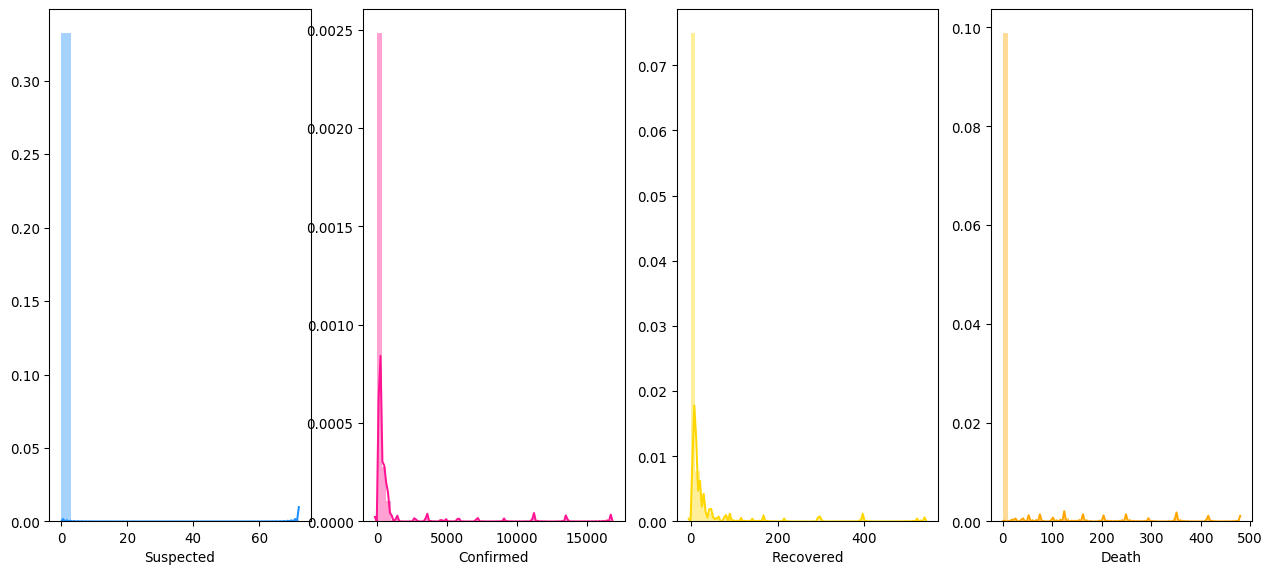

In [101]:
fig, axes = plt.subplots(1, 4, figsize=(16, 7), sharey=False,sharex=False, dpi=97)
sns.distplot(set.Suspected , color="dodgerblue", ax=axes[0], axlabel='Suspected')
sns.distplot(set.Confirmed , color="deeppink", ax=axes[1], axlabel='Confirmed')
sns.distplot(set.Recovered , color="gold", ax=axes[2], axlabel='Recovered')
sns.distplot(set.Death , color="orange", ax=axes[3], axlabel='Death')